# In Depth: Naive Bayes Classification

<!--BOOK_INFORMATION-->

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Feature Engineering](05.04-Feature-Engineering.ipynb) | [Contents](Index.ipynb) | [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) >

``Naive Bayes models`` are a group of **extremely fast and simple** classification algorithms that are often suitable for **very high-dimensional** datasets.

A quick-and-dirty baseline for a classification problem.
- so fast
- so few tunable parameters
- very useful 


This section will focus on 
- an intuitive explanation of how naive Bayes classifiers work
- followed by a couple examples of them in action on some datasets.



## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods. 

Bayes's theorem is an equation describing the relationship of conditional probabilities of statistical quantities.

- We are intrested in finding the probability of a label given some observed features
    - which we can write as $P(L~|~{\rm features})$.

Bayes's theorem:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

$$
\mbox{posterior} =  \frac{\mbox{likelihood}\times \mbox{prior}}{\mbox{evidence}} \
$$



https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In practice, there is interest only in the numerator of that fraction, 
- because the denominator does not depend on $L$ and the values of the features $x_i$ are given
- so that the denominator is effectively constant.

The numerator is equivalent to the ``joint probability`` model

$$p(x_1, \dots, x_n|L_k) p(L_k)  = p(L_k, x_1, \dots, x_n)$$


$$
p(L_k \mid x_1, \dots, x_n)  \varpropto p(L_k, x_1, \dots, x_n)
$$


\begin{align}
p(L_k, x_1, \dots, x_n) & = p(x_1, \dots, x_n, L_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, L_k) p(x_2, \dots, x_n, L_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, L_k) p(x_2 \mid x_3, \dots, x_n, L_k) p(x_3, \dots, x_n, L_k) \\
                        & = \dots \\
                        & = p(x_1 \mid x_2, \dots, x_n, L_k) p(x_2 \mid x_3, \dots, x_n, L_k) \dots   p(x_{n-1} \mid x_n, L_k) p(x_n \mid L_k) p(L_k) \\
\end{align}



Now the "naive" conditional independenLe assumptions come into play: assume that each feature $x_i$ is conditionally statistical independence of every other feature $x_j$ for $j\neq i$, given the category $L_k$.  This means that

$$p(x_i \mid x_{i+1}, \dots ,x_{n}, L_k ) = p(x_i \mid L_k)$$

Thus, the joint model can be expressed as


\begin{align}
p(L_k \mid x_1, \dots, x_n) & \varpropto p(L_k, x_1, \dots, x_n) = \\
                            & = p(L_k) \ p(x_1 \mid L_k) \ p(x_2\mid L_k) \ p(x_3\mid L_k) \ \cdots \\
                            & = p(L_k) \prod_{i=1}^n p(x_i \mid L_k)\,.
\end{align}


The maximum a posteriori (MAP) decision rule

$$\hat{y} = \underset{k \in \{1, \dots, K\}}{\operatorname{argmax}} \ p(C_k) \displaystyle\prod_{i=1}^n p(x_i \mid C_k)$$


## Bayesian Classification

If we are trying to decide between two labels $L_1$ and $L_2$
- to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

We can compute $P({\rm features}~|~L_i)$ for each label.
- Such a model is called a *generative model* 
    - because it specifies the hypothetical random process that generates the data.

## Bayesian Classification

``Specifying this generative model`` for each label is the main piece of the training of such a Bayesian classifier.
- The general version of such a training step is a very difficult task, 
- but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: 
- if we make very naive assumptions about the generative model for each label, 
    - we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
    
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.



## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
- In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.

Imagine that you have the following data:

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Normal distribution (Gaussian) distribution. 

The probability density of the normal distribution is

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
$$

For example, suppose the training data contains a continuous attribute, $x$. 

We first segment the data by the class, and then compute the mean and variance of $x$ in each class. 
- Let $\mu_k$ be the mean of the values in $x$ associated with class $C_k$
- Let $\sigma^2_k$ be the variance of the values in $x$ associated with class $C_k$. 

Suppose we have collected some observation value $v$. 
Then, the probability distribution of $v$ given a class $C_k$, 

$p(x=v \mid C_k)$, can be computed by plugging $v$ into the equation for a Normal distribution parameterized by $\mu_k$ and $\sigma^2_k$. That is,



\begin{align}
p(x=v \mid C_k)=\frac{1}{\sqrt{2\pi\sigma^2_k}}\,e^{ -\frac{(v-\mu_k)^2}{2\sigma^2_k} }
\end{align}


In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

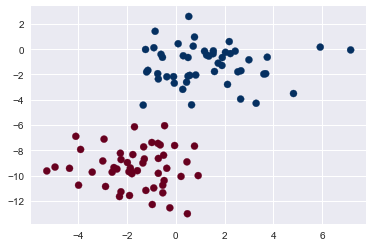

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that 
- the data is described by a Gaussian distribution with no covariance between dimensions.

This model can be fit by 
- simply finding the mean and standard deviation of the points within each label

The result of this naive Gaussian assumption is shown in the following figure:

![(run code in Appendix to generate image)](img/figures/05.05-gaussian-NB.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

The ellipses here represent the Gaussian generative model for each label
- with larger probability toward the center of the ellipses.

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point
- and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [17]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

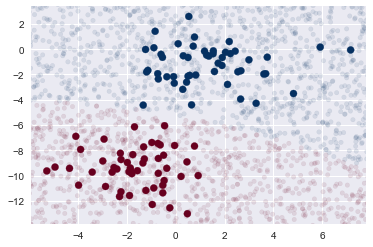

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
# The columns give the posterior probabilities of the first and second label, respectively.

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

The final classification will only be as good as the model assumptions that lead to it
- This is why Gaussian naive Bayes often does not produce very good results.

## Multinomial Naive Bayes

- The Gaussian assumption is only one simple assumption that could be used to specify the generative distribution for each label.
- Multinomial naive Bayes assumes that the features are generated from a simple multinomial distribution.

$$
p(\mathbf{x} \mid L_k) = \frac{(\sum_i x_i)!}{\prod_i x_i !} \prod_i {p_{ki}}^{x_i}
$$

The multinomial distribution describes the probability of observing counts among a number of categories, 
- multinomial naive Bayes is most appropriate for features that represent counts or count rates.
- The idea is precisely the same as before, but we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in ``text classification``
- the features are related to word counts or frequencies within the documents to be classified.
    - the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb)

Using the sparse word count features from the 20 Newsgroups corpus to classify these documents.
- Let's download the data and take a look at the target names:

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



To convert the content of each string into a vector of numbers.
- Use TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb))
- Create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Evaluate the performance of the estimator.
- the confusion matrix between the true and predicted labels for the test data

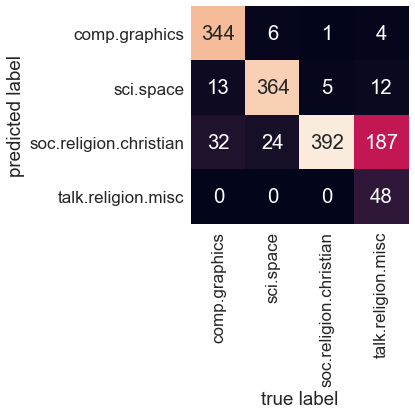

In [9]:
from sklearn.metrics import confusion_matrix
sns.set_context("notebook", font_scale=1.7)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, 
- but it gets confused between talk about religion and talk about Christianity.
- This is perhaps an expected area of confusion!

### The very cool thing here
we now have the tools to determine the category for *any* string
- using the ``predict()`` method of this pipeline.

Here's a quick utility function that will return the prediction for a single string:

In [10]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [11]:
predict_category('sending a payload to the ISS')

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


'sci.space'

In [12]:
predict_category('discussing islam vs atheism')

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


'soc.religion.christian'

In [13]:
predict_category('determining the screen resolution')

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; 
- nevertheless, the result is striking.

> ##  Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.

Advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

## When to Use Naive Bayes


A good choice as an initial baseline classification.
- If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
- If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important


## When to Use Naive Bayes

The last two points seem distinct, but they actually are related: 
- as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
- clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.

> ## simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

<!--NAVIGATION-->
< [Feature Engineering](05.04-Feature-Engineering.ipynb) | [Contents](Index.ipynb) | [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) >